In [2]:
from tensorflow.python.keras.applications.vgg16 import VGG16


In [3]:
model = VGG16()


# 学習せずにそのまま使う : sử dụng model mà không sửa đổi. 

In [4]:
# モデルのサマリを確認する。入力層のサイズが224 x 224、
# 出力層は1000クラス分の確率が出力される構造になっている
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
import requests
import os

target_dir = 'img/'
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    
url = 'http://farm1.static.flickr.com/112/367539245_b13d422a3a.jpg'
fileName = 'img/dog.jpg'
req = requests.get(url)
file = open(fileName, 'wb')
for chunk in req.iter_content(100000):
    file.write(chunk)
file.close()

url = 'http://farm1.static.flickr.com/22/32700677_95fe411259.jpg'
fileName = 'img/cat.jpg'
req = requests.get(url)
file = open(fileName, 'wb')
for chunk in req.iter_content(100000):
    file.write(chunk)
file.close()

print('download is finished.')


download is finished.


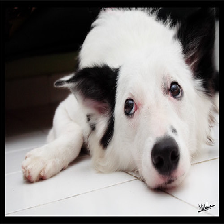

In [6]:
from keras.preprocessing.image import load_img

# 画像をロードする。load_img()では、読み込み時に画像をリサイズすることが
# 出来るので、VGG16の入力サイズ 224 x 224 にリサイズする

img_dog = load_img('img/dog.jpg', target_size=(224, 224))
img_cat = load_img('img/cat.jpg', target_size=(224, 224))
img_dog

### Hình ảnh được đọc bởi hàm loat_img () mang định dạng dữ liệu là Pillow, vì vậy nó không thể sử dụng được làm đầu vào của model hiện tại. 
* #### Vì vậy cần sử dụng hàm img_to_array để chuyển đổi hình ảnh về thành dạng numpy.array.
* #### Sau đó, hàm preprocess_input được sử dụng để chuyển đổi nó thành giá trị phù hợp với giá trị đầu vào của model VGG16. Hàm này thực hiện một sự biến đổi gọi là 中心化, lấy giá trị đầu vào trừ đi giá trị trung bình của hình ảnh tại thời điểm học và thay đổi thứ tự của các kênh màu (RGB → BGR).

In [7]:
from keras.preprocessing.image import img_to_array

# loat_img()はpillowと呼ばれる画像ライブラリのデータフォーマットに
# なっている為、そのままでは利用できない
# 一般できな数値データとして扱う為、numpy.ndarrayに変換
arr_dog = img_to_array(img_dog)
arr_cat = img_to_array(img_cat)


In [9]:
from keras.applications.vgg16 import preprocess_input

# 画像の各チャンネルの中心化とRGBからBGRへの変換を行う。
# 画像をVGG16モデルの事前学習時と同じ状態に合わせて変換
arr_cat = preprocess_input(arr_cat)
arr_dog = preprocess_input(arr_dog)
arr_dog.shape

(224, 224, 3)

### Thông thương dữ liệu sẽ nhập nhiều hình ảnh vào cùng một lúc, để tiện cho việc thực hiện, chúng ta để đầu vào dưới dạng 1 stack.

In [10]:
import numpy as np

# 一般的な判別モデルは、複数の画像・データを一度に入力し、
# データの数だけ結果を出力できる
# 犬と猫の画像をまとめて、２枚の画像を含む配列の入力データに変換
arr_input = np.stack([arr_dog, arr_cat])

#入力データのshapeを確認
print('shape of arr_input:', arr_input.shape)


shape of arr_input: (2, 224, 224, 3)


### Sử dụng model.predict để tính toán kết quả dự đoán đối với đầu vào stack arr_input. Kết quả đầu ra là vector 1000 chiều. 

In [11]:
# 予測値（確率）を算出
# 推論では 2 x 1000の2次元配列が出力される
probs = model.predict(arr_input)

# 予測値のshapeを確認
print('shape of probs:', probs.shape)

# 予測値の表示
probs


shape of probs: (2, 1000)


array([[3.2082234e-12, 1.3752378e-10, 1.1632433e-08, ..., 1.6564204e-12,
        3.7911558e-09, 1.4346278e-07],
       [2.5339826e-08, 1.1024458e-06, 1.2550442e-08, ..., 6.1859478e-09,
        1.9540323e-04, 4.8938236e-05]], dtype=float32)

### Sử dụng hàm decode_predictions để hiển thị kết quả dưới dạng tên của các lớp và hiển thị 5 lớp đầu tiên có xác suất lớn nhất.

In [12]:
from keras.applications.vgg16 import decode_predictions

# 予測結果は、1000クラスそれぞれの確率のみで返されるため、
# クラス名が判断しにくいため
# decode_predictions()を使ってわかりやすい結果に変換し、
# 上位５つを表示
results = decode_predictions(probs)


In [13]:
results[0]


[('n02106166', 'Border_collie', 0.4106112),
 ('n02106030', 'collie', 0.19950843),
 ('n02109961', 'Eskimo_dog', 0.13178933),
 ('n02110185', 'Siberian_husky', 0.102640174),
 ('n02111500', 'Great_Pyrenees', 0.058810916)]

In [14]:
results[1]

[('n02123394', 'Persian_cat', 0.42492098),
 ('n02124075', 'Egyptian_cat', 0.27027684),
 ('n02123159', 'tiger_cat', 0.14049941),
 ('n02123045', 'tabby', 0.08443727),
 ('n02328150', 'Angora', 0.026546799)]

# 転移学習: Transfer Learning

### Nếu đầu vào là 1 ảnh "chùa" hoặc "đền", thì khác với đầu vào là chó, mèo. Vì những phân loại này không xuất hiện trong tập ImageNet nên nếu vẫn sử dụng model thì xác xuất đầu ra trả về kết quả "chùa" hoặc "đền" là không có
### Hơn nữa, model VGG16 chưa từng học tập để tìm ra những đặc điểm của "chùa", "đền" nên không thể phân biệt được
### Vậy, có ích gì không nếu sử dụng model cũ trong quá trình học lại ?
* #### Không cần định nghĩa lại mô hình network mà sử dụng lại hầu hết cấu trúc của model cũ
* #### VGG16 có khả năng phân tích chính xác một lượng lớn các lớp. Ngay cả khi chưa học "chùa" và "đền" cũng đã học được những cách thức hiệu quả trong việc phân tích từ những lớp khác
* #### Độ chính xác tốt ngay cả đối với ít dữ liệu hơn và thời gian học tập ngắn hơn

In [15]:
from keras.applications.vgg16 import VGG16

# 既存の1000クラスの出力を使わないため、
# include_top=Falseとして出力層を含まない状態でロード
# sử dụng element include_top=False để bỏ lớp đầu ra 1000 chiều. 
vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3))

# モデルのサマリを確認。出力層が含まれていないことがわかる
vgg16.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# モデルを編集し、ネットワークを生成する関数の定義
def build_transfer_model(vgg16):
    """ モデルを編集し、ネットワークを生成する """
    """ Chỉnh sửa model và tạo network """
    
    #読みだしたモデルを使って、新しいモデルを作成
    #Tạo ra mô hình mới Sequential từ việc sử dụng mô hình đã được đọc vgg16 1 lần 
    model = Sequential(vgg16.layers)
    
    # 読みだした重みの一部は再学習しないように設定: Cài đặt 1 phần của các trọng số đã đọc thành không cần học lại.
    # ここでは、追加する層と出力層に近い層の重みのみを再学習: chỉ cần học các lớp mới được thêm vào và lớp gần với lớp đầu ra 
    # Việc cập nhật trọng số chỉ cần thiết đối với những lớp gần với lớp đầu ra. Vì thế cài đặt 15 lớp đầu tiên không cần cập nhật lại trọng số.
    for layer in model.layers[:15]:
        layer.trainable = False
        
    # 追加する出力部分の層を構築
    # Cấu trúc lại mô hình với lớp đầu ra được thêm mới. 
    model.add(Flatten()) # dữ liệu được flatten và cho vào fully connected layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# 定義した関数を呼び出してネットワークを生成
model = build_transfer_model(vgg16)


In [17]:
from keras.optimizers import SGD

model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(lr=1e-4, momentum=0.9), #Tốc độ học được đặt ở mức thấp (1e-4) để áp dụng trọng số cho task hiện tại trong khi sử dụng trọng số của VGG16 hiện có.
    metrics=['accuracy']
)

# モデルのサマリを確認
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Tạo ra bộ Generator 

In [18]:
# Sử dụng ImageDataGenerator để tạo Generator để đọc hình ảnh đào tạo trong các mini-batch.
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import preprocess_input

# 学習用画像をロードするためのジェネレータを生成。
# スケール変換やデータ拡張の引数を指定
idg_train = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)


# Tạo ra trình lặp 
* Trình lặp yêu cầu 2 loại, 1 loại để học, 1 loại dùng để kiểm tra 
* Hàm "flow_from_directory" tạo ra một trình lặp đọc hình ảnh từ thư mục được chỉ định và trả về hình ảnh và nhãn chính xác khi học hoặc dự đoán.
* Sau khi thực hiện, số lượng hình ảnh và số lượng các lớp trong thư mục đích đầu ra theo phương thức Flow_from_directory được hiển thị.


In [19]:
# List: 6.17
# 画像をロードするためのイテレータを生成

# 訓練用データ（学習時に利用）
img_itr_train = idg_train.flow_from_directory(
    'img/shrine_temple/train',
    target_size=(224,224),
    batch_size=16,
    class_mode='binary'
)

# 検証用データ(学習時に利用)
img_itr_validation = idg_train.flow_from_directory(
    'img/shrine_temple/validation',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)


FileNotFoundError: [Errno 2] No such file or directory: 'img/shrine_temple/train'